# Analiza knjig

V analizi bom obravnaval nekaj manj kot deset tisoč knjig, katerih podatke sem izluščil iz spletne strani [Book Depository](https://www.bookdepository.com/). Vse knjige so vzete iz spletne podkategorije "Teen & Young Adult". Zajel sem trinajst podatkov posamezne knjige kot so kategorije, med katere spada, njen avtor, datum izdaje in njen založnik. Med njimi so tudi bolj specifični podatki, na primer, število glasov ter ocena, ki temelji samo na teh podatkih in se lahko razlikuje od ocen na drugih spletnih portalih.
V analizi me zanimajo naslednje hipoteze:
* Večje število strani pomeni višjo oceno
* Kvaliteta knjig se s časom zmanjšuje, kar potrdijo ocene
* Knjige izdane poleti imajo boljše ocene kot ostale
* Večji založniki imajo boljše ocene kot manjši in manj znani
* Država in jezik izdaje imata vpliv na oceno


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20

knjige = pd.read_csv("../bolsa analiza podatkov/all_teen_and_young_adult/koncni.csv")
knjige

,kategorije,naslov,ocena,stevilo_glasov,avtor,lestvica,starost,stevilo_strani,mesec,datum,zaloznik,drzava,jezik
0,"['Classic Books for Children', 'Children's Gen...",Tales from Moominvalley,4.32,8268.0,Thomas Warburton,"61,101",9-12,192.0,Apr,2013,St Martin's Press,United States,English
1,"['Fantasy', 'Fantasy Books', 'Funny Books & St...","That Time I Got Reincarnated as a Slime, Vol. ...",4.43,1444.0,Mitz Vah,"5,198",12-15,288.0,Dec,2018,"Little, Brown & Company",United States,English
2,"['General Knowledge', 'Children's Reference Bo...",Oxford Very First Dictionary,4.50,2.0,Georgie Birkett,"24,488",12-17,64.0,May,2012,Oxford University Press,United Kingdom,English
3,"['Adventure Books for Kids', 'Mystery Books fo...",The Black Circle,4.01,51146.0,Patrick Carman,"24,926",12-17,176.0,Nov,2010,Scholastic US,United States,English
4,"['Children's General Story Books', 'Romance Bo...",The Statistical Probability of Love at First S...,3.77,113570.0,Jennifer E Smith,"25,124",12-17,272.0,Jan,2013,"Little, Brown & Company",United States,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,"['Reference Works', 'Science: General Issues',...",Cosmos,4.38,137932.0,Ann Druyan,"1,803",12-15,432.0,Feb,2020,Random House USA Inc,United States,English
9810,"['Children's General Story Books', 'Adventure ...",Children of Blood and Bone,4.11,206103.0,Tomi Adeyemi,"6,445",12-15,544.0,Mar,2018,Pan Macmillan,United Kingdom,English
9811,"['People & Places', 'Relationships']",A Smart Girl's Guide: Friendship Troubles : De...,4.04,870.0,Angela Martini,"5,958",9-12,86.0,Aug,2013,American Girl Publishing Inc,NaN,English
9812,"['Children's Fiction', 'Children's General Sto...",History Is All You Left Me : The much-loved hi...,3.96,64268.0,Adam Silvera,"12,819",12+,304.0,Feb,2017,Simon & Schuster Ltd,United Kingdom,English


Poglejmo najprej odvisnost ocene knjige od števila strani.

,naslov
zaokrozene_ocene,
3.0,125
4.0,8745
5.0,678


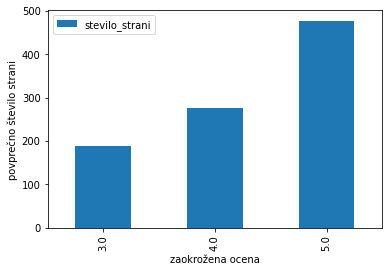

In [91]:
knjige["zaokrozene_ocene"] =  round(knjige["ocena"])
po_ocenah = knjige[knjige.stevilo_glasov > 5]
po_ocenah[["zaokrozene_ocene", "stevilo_strani"]].groupby("zaokrozene_ocene").mean().plot.bar(xlabel="zaokrožena ocena",ylabel="povprečno število strani")
po_ocenah[["naslov", "zaokrozene_ocene"]].groupby("zaokrozene_ocene").count()

Graf prikazuje povprečno število strani pri zaokroženi oceni knjige. Iz grafa vidimo očitno povezavo, višjo kot želimo imeti oceno, več strani moramo napisati. V tabeli nad grafom imamo število knjig, ki spadajo posamezni oceni. Vidimo, da ima velika večina knjig oceno med 3.51 in 4.5 točke.
Tako korelacijo števila strani in ocene so verjetno sebi v prid izkoristili literarni velikani z več izdanimi knjigami. Poglejmo kaj nam govorijo podatki.

<AxesSubplot:xlabel='avtor'>

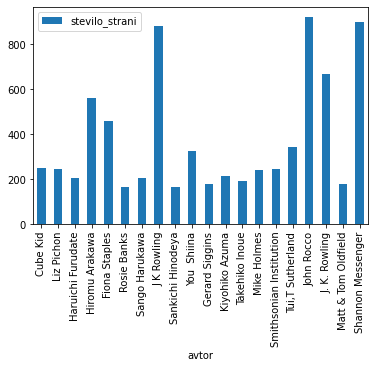

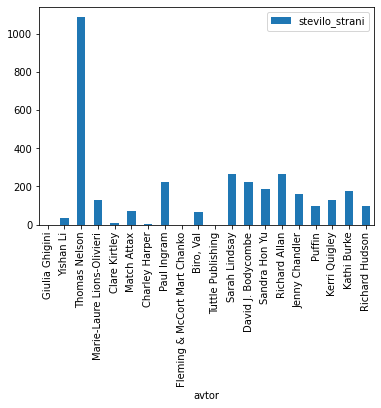

In [92]:
po_avtorjih = knjige.groupby("avtor")
odlicni_avtorji = po_avtorjih.mean()
odlicni_avtorji_z_manj_knjigami = odlicni_avtorji[(odlicni_avtorji.ocena > 4.5) & (po_avtorjih.size() <= 3)]
odlicni_avtorji = odlicni_avtorji[(odlicni_avtorji.ocena > 4.5) & (po_avtorjih.size() > 3)]
odlicni_avtorji.sort_values("ocena",ascending=False).head(20).plot.bar(y="stevilo_strani")
odlicni_avtorji_z_manj_knjigami.sort_values("ocena",ascending=False).head(20).plot.bar(y="stevilo_strani")

In [93]:
po_ocenah = odlicni_avtorji.sort_values("ocena",ascending=False)[(odlicni_avtorji.ocena > 4.5)&(po_avtorjih.size() > 3)]["ocena"].head(20)
po_ocenah

C:\Users\jostv\AppData\Local\Temp\ipykernel_3376\1622503069.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  po_ocenah = odlicni_avtorji.sort_values("ocena",ascending=False)[(odlicni_avtorji.ocena > 4.5)&(po_avtorjih.size() > 3)]["ocena"].head(20)


avtor
Cube Kid                   4.711111
Liz Pichon                 4.645000
Haruichi Furudate          4.631765
Hiromu Arakawa             4.617222
Fiona Staples              4.603333
Rosie Banks                4.589091
Sango Harukawa             4.583000
J K Rowling                4.572222
Sankichi Hinodeya          4.570000
You  Shiina                4.570000
Gerard Siggins             4.567500
Kiyohiko Azuma             4.565333
Takehiko Inoue             4.541667
Mike Holmes                4.538333
Smithsonian Institution    4.532500
Tui,T Sutherland           4.531250
John Rocco                 4.525000
J. K. Rowling              4.522245
Matt & Tom Oldfield        4.522222
Shannon Messenger          4.518000
Name: ocena, dtype: float64

In [94]:
po_ocenah_z_manj_knjigami = odlicni_avtorji_z_manj_knjigami.sort_values("ocena",ascending=False)[(odlicni_avtorji_z_manj_knjigami.ocena > 4.5)&(po_avtorjih.size() <= 3)]["ocena"].head(20)
po_ocenah_z_manj_knjigami

C:\Users\jostv\AppData\Local\Temp\ipykernel_3376\1427279809.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  po_ocenah_z_manj_knjigami = odlicni_avtorji_z_manj_knjigami.sort_values("ocena",ascending=False)[(odlicni_avtorji_z_manj_knjigami.ocena > 4.5)&(po_avtorjih.size() <= 3)]["ocena"].head(20)


avtor
Giulia Ghigini                  5.0
Yishan Li                       5.0
Thomas Nelson                   5.0
Marie-Laure Lions-Olivieri      5.0
Clare Kirtley                   5.0
Match Attax                     5.0
Charley Harper                  5.0
Paul Ingram                     5.0
Fleming & McCort Mart Chanko    5.0
Biro, Val                       5.0
Tuttle Publishing               5.0
Sarah Lindsay                   5.0
David J. Bodycombe              5.0
Sandra Hon Yu                   5.0
Richard Allan                   5.0
Jenny Chandler                  5.0
Puffin                          5.0
Kerri Quigley                   5.0
Kathi Burke                     5.0
Richard Hudson                  5.0
Name: ocena, dtype: float64

<AxesSubplot:xlabel='avtor'>

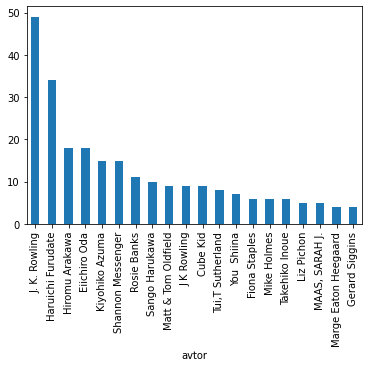

In [95]:
stevilo_izdaj = po_avtorjih["naslov"].count()
dobre_izdaje = stevilo_izdaj[po_avtorjih.mean().ocena > 4.5]
dobre_izdaje.sort_values(ascending=False).head(20).plot.bar()



Predstavljena imamo tri grafe in dve referenčni tabeli ocen. Na prvem grafu se omejimo na avtorje z več kot tremi izdajami, na drugem pa obravnavamo avtorje s tremi ali manj. Oba ta grafa prikazujeta povprečno število strani posamezne knjige in sta urejena po padajočih ocenah. Tabele so zraven predstavljene za lažjo primerjavo ocen med avtorji na prvih dveh grafih. Zadnji graf predstavlja število izdanih knjig posameznega avtorja, ki ima povprečno oceno večjo od štiri in pol. Vidimo da so nekateri izmed njih ugotovili skrivnost uspešnega avtorja, z mnogo izajami. (Posebaj J. K. Rowling s kar dvema stolpecma!). Kako pa na oceno vpliva leto izdaje? Ali bi lahko na to vplival tudi sam mesec v letu? 

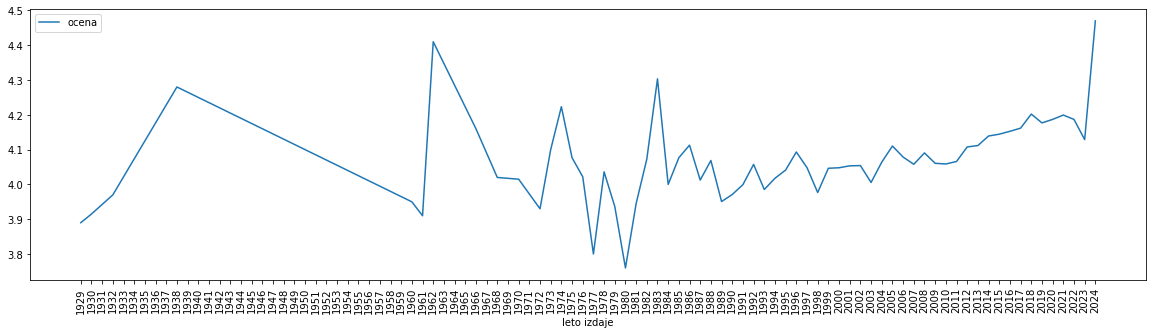

In [96]:
po_datumu = knjige.groupby("datum")
po_datumu.mean().plot(y="ocena", xlabel="leto izdaje",xticks=[(1929 + i) for i in range(96)],figsize=(20,5), rot=90)
stevilo_na_leto = po_datumu["naslov"].count()


<AxesSubplot:xlabel='leto izdaje', ylabel='število izdanih knjig'>

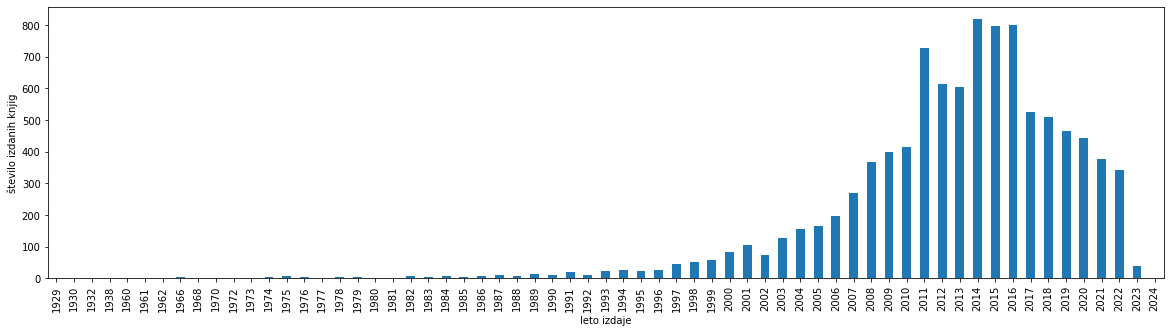

In [97]:
stevilo_na_leto.plot.bar(ylabel="število izdanih knjig",xlabel="leto izdaje", figsize=(20,5))

<AxesSubplot:xlabel='mesec'>

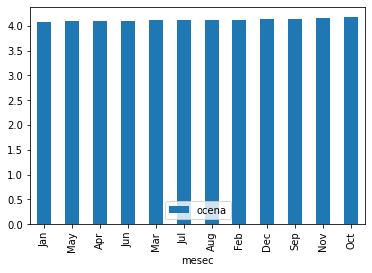

In [98]:
po_mesecu = knjige.groupby("mesec")
po_mesecu.mean().sort_values("ocena").plot.bar(y="ocena")

<AxesSubplot:>

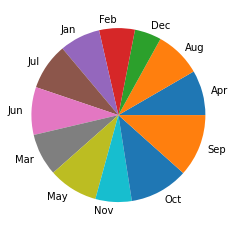

In [99]:
po_mesecu["naslov"].count().plot.pie(ylabel="")

S povečanim številom izdanih knjig se povprečna ocena stabilizira in s časom povečuje. Zadnji skok na prvem grafu bo verjetno še normaliziran z novimi izdajami to leto, ki jih bo pričakovano še manj kot prejšnje. Očitno so se avtorji odločili da kvaliteta vendarle premaga kvaliteto. Sam mesec izdaje ima minimalen vpliv na oceno, in ga pri izdaji svoje knjige smatrajte za brezpredmetnega. Naslednji razdelek nam bo povedal ali je pomembna izbira založnika. Mogoče pridemo skozi prav tako dobro s cenejšo možnostjo.

<AxesSubplot:xlabel='založnik'>

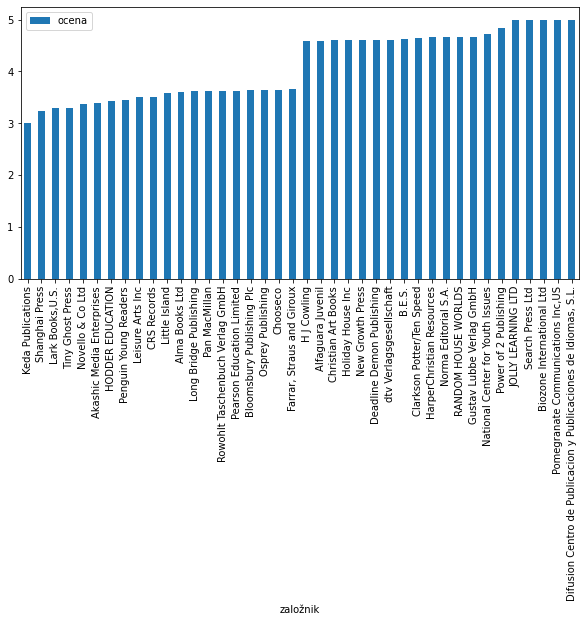

In [100]:
po_zalozniku = knjige.groupby("zaloznik")
najslabsi = po_zalozniku.mean().sort_values("ocena").head(20)
najboljsi = po_zalozniku.mean().sort_values("ocena", ascending=False).head(20)
skupaj = pd.concat([najboljsi, najslabsi])
skupaj.sort_values("ocena").plot.bar(y="ocena", figsize=(10,5), xlabel="založnik")


<AxesSubplot:xlabel='založnik', ylabel='število izdaj'>

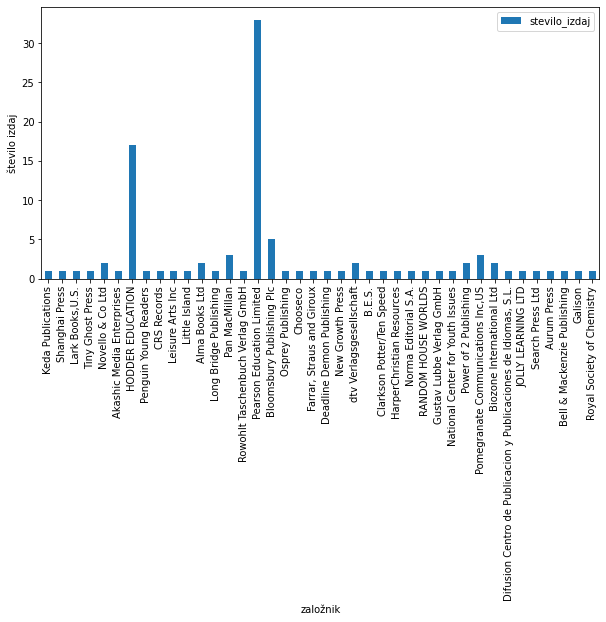

In [101]:
stevilo_izdaj_zaloznika = po_zalozniku.naslov.count()
skupni_graf = po_zalozniku.mean()
skupni_graf["stevilo_izdaj"] = stevilo_izdaj_zaloznika
hd = skupni_graf.sort_values("ocena").head(20)
tl = skupni_graf.sort_values("ocena").tail(20)
hdtl = pd.concat([hd, tl])
hdtl.sort_values("ocena").plot.bar(y="stevilo_izdaj", ylabel="število izdaj", xlabel="založnik", figsize=(10,5))


V zgornja grafa sem vklučil dvajset najbolje ocenjenih in dvajset najslabše ocenjenih založnikov. Vidimo, da je izbira založnika lahko zelo pomembna, saj je razlika v oceni lahko tudi slabi dve točki. Če izberete pravega, ima vaša knjiga večjo možnost za uspeh. Ne le to, morda na sestanku pred izdajo srečate prav svojega najljubšega avtorja, ki je verjetno izbal istega, najboljšega založnika. 
Mislite, da ste rojeni pod srečno zvezdo? Bomo videli, kaj govorijo podatki. Morda se boste morali pri izdaji v upanju za boljšo oceno preseliti ali pa morda celo naučiti nov jezik!

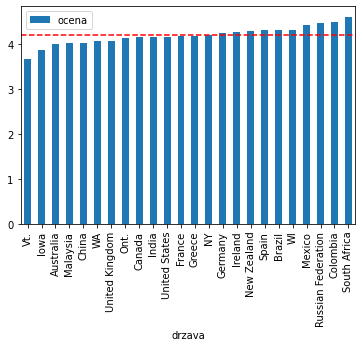

In [102]:
po_drzavi = knjige.groupby("drzava")
povp_ocena = po_drzavi.ocena.mean()
povp_ocena = povp_ocena.mean()
po_drzavi.mean().sort_values("ocena").plot.bar(y="ocena").axhline(color='red', y=povp_ocena, linestyle='--')


<AxesSubplot:xlabel='jezik'>

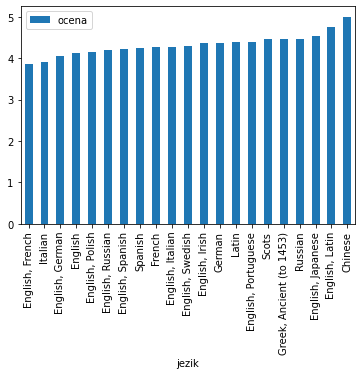

In [103]:
po_jeziku = knjige.groupby("jezik")
po_jeziku.mean().sort_values("ocena").plot.bar(y="ocena")

Pri prvem grafu smo knjige dali v skupine ki predstavljajo državo, v kateri je bila knjiga izdana. Na prvi pogled se je najbolje preseliti v Rusijo in izdati knjigo tam, vendar po sankcijah nevem če je to še optimalna odločitev. Bonus pri oceni, ki ga pridobimo, če knjigo izdamo na Kitajsem, se izniči, če knjigo napišemo v kitajščini. Če v to štejemo tudi to, da se rabimo prej naučiti kitajščino, se nam knjigo verjetno splača napisati v enem izmed jezikov, ki jih že znamo. 

C:\Users\jostv\AppData\Local\Temp\ipykernel_3376\3353741331.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  po_starosti["stevilo_glasov", "ocena"].mean().sort_values("ocena").plot.bar(y="stevilo_glasov")


<AxesSubplot:xlabel='starost'>

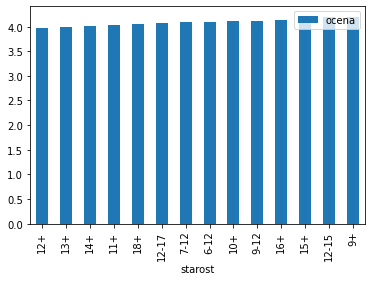

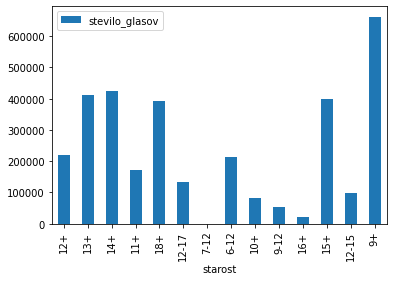

In [116]:
po_starosti = knjige.groupby("starost")
po_starosti.mean().sort_values("ocena").plot.bar(y="ocena")
po_starosti["stevilo_glasov", "ocena"].mean().sort_values("ocena").plot.bar(y="stevilo_glasov")

Naša knjiga bo najbolje prodajana, če je namenjena za devetletnike (ali starejše). Z mnogo večjim številom glasov lahko predpostavimo da je ta podkategorija najbolj prodajana. Ne le to - tako imamo tudi možnost, da bo bolje ocenjena, kot če bi jo namenili drugi starostni skupini.

# Kratek zaključek
Prva hipoteza je bila potrjena, saj je večje število strani prineslo s sabo tudi višjo oceno. Verjetno, da napišeš več strani pomeni tudi, da si boljši pisatelj, ampak pustimo te detalje za kdaj drugič. Kvaliteta knjig se s časom v resnici povečuje. Vsaj pri teh na spletni strani Book Depository. Verjamem da se vsako leto izda veliko število knjig, ki jim nemoremo res reči kavlitetne. Mesec izdaje ima minimalen vpliv na oceno knjig. Veliko manjši kot izbira založnika, jezika ali pa države, v kateri se knjiga izda.

In [121]:
po_kategorijah = knjige
po_kategorijah.explode("kategorije")

,kategorije,naslov,ocena,stevilo_glasov,avtor,lestvica,starost,stevilo_strani,mesec,datum,zaloznik,drzava,jezik,zaokrozene_ocene
0,"['Classic Books for Children', 'Children's Gen...",Tales from Moominvalley,4.32,8268.0,Thomas Warburton,"61,101",9-12,192.0,Apr,2013,St Martin's Press,United States,English,4.0
1,"['Fantasy', 'Fantasy Books', 'Funny Books & St...","That Time I Got Reincarnated as a Slime, Vol. ...",4.43,1444.0,Mitz Vah,"5,198",12-15,288.0,Dec,2018,"Little, Brown & Company",United States,English,4.0
2,"['General Knowledge', 'Children's Reference Bo...",Oxford Very First Dictionary,4.50,2.0,Georgie Birkett,"24,488",12-17,64.0,May,2012,Oxford University Press,United Kingdom,English,4.0
3,"['Adventure Books for Kids', 'Mystery Books fo...",The Black Circle,4.01,51146.0,Patrick Carman,"24,926",12-17,176.0,Nov,2010,Scholastic US,United States,English,4.0
4,"['Children's General Story Books', 'Romance Bo...",The Statistical Probability of Love at First S...,3.77,113570.0,Jennifer E Smith,"25,124",12-17,272.0,Jan,2013,"Little, Brown & Company",United States,English,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,"['Reference Works', 'Science: General Issues',...",Cosmos,4.38,137932.0,Ann Druyan,"1,803",12-15,432.0,Feb,2020,Random House USA Inc,United States,English,4.0
9810,"['Children's General Story Books', 'Adventure ...",Children of Blood and Bone,4.11,206103.0,Tomi Adeyemi,"6,445",12-15,544.0,Mar,2018,Pan Macmillan,United Kingdom,English,4.0
9811,"['People & Places', 'Relationships']",A Smart Girl's Guide: Friendship Troubles : De...,4.04,870.0,Angela Martini,"5,958",9-12,86.0,Aug,2013,American Girl Publishing Inc,NaN,English,4.0
9812,"['Children's Fiction', 'Children's General Sto...",History Is All You Left Me : The much-loved hi...,3.96,64268.0,Adam Silvera,"12,819",12+,304.0,Feb,2017,Simon & Schuster Ltd,United Kingdom,English,4.0
